**PyGAD**

**Przykład 1**

Poszukiwanie minimum funkcji

In [1]:
import numpy as np
import pygad
import matplotlib.pyplot as plt

In [ ]:
# ==========================================
# Funkcja celu (chcemy ją MINIMALIZOWAĆ)
# PyGAD MAKSYMALIZUJE, więc zwracamy -f(x)
# ==========================================

def fitness_func(ga_instance, solution, solution_idx):
# ga_instance – obiekt klasy GA (zawiera całą konfigurację i stan populacji)
# solution – chromosom (tablica genów)
# solution_idx – indeks bieżącego osobnika w populacji

    x = solution[0] # wykorzystujemy tylko pierwszy element rozwiązania
    f = x**2 + 3*np.sin(5*x)
    return f   # bo PyGAD maksymalizuje ff

In [28]:
# ==========================================
# Konfiguracja i uruchomienie GA
# ==========================================

# Zakres zmiennej: x ∈ [-5, 5]
INIT_LOW, INIT_HIGH = -50.0, 50.0

ga = pygad.GA(
    num_generations=1000,          # liczba pokoleń
    num_parents_mating=10,       # ilu rodziców bierze udział w krzyżowaniu
    fitness_func=fitness_func,   # funkcja celu
    sol_per_pop=1000,              # liczebność populacji
    num_genes=1,                 # liczba genów (tutaj tylko x)
    init_range_low=INIT_LOW,
    init_range_high=INIT_HIGH,
    mutation_percent_genes=100,  # mutujemy zawsze ten jeden gen
    mutation_type="random",      # mutacja losowa w zakresie
    mutation_by_replacement=True,
    parent_selection_type="tournament", # selekcja turniejowa
    K_tournament=3,              # wielkość grupy turniejowej
    crossover_type="single_point"  # typ krzyżowania
)

ga.run()

In [29]:
# =======================================================
# Wynik optymalizacji (chromosom najlepiej przystosowany)
# =======================================================

# Przeszukuje całą populację, sprawdza wartości ff wszystkich osobników,
# wybiera ten, który ma najwyższy ff (PyGAD zawsze maksymalizuje)

solution, solution_fitness, solution_idx = ga.best_solution()
# solution – wektor genów najlepszego osobnika
# solution_fitness – wartość ff najlepszego osobnika
# solution_idx – indeks najlepszego osobnika w populacji

best_x = solution[0]
best_f = solution_fitness   # odwracamy znak, żeby mieć f(x)

print(f"Najlepsze znalezione x: {best_x:.6f}")
print(f"f(x) = {best_f:.6f}")

Najlepsze znalezione x: -49.826156
f(x) = 2485.077292


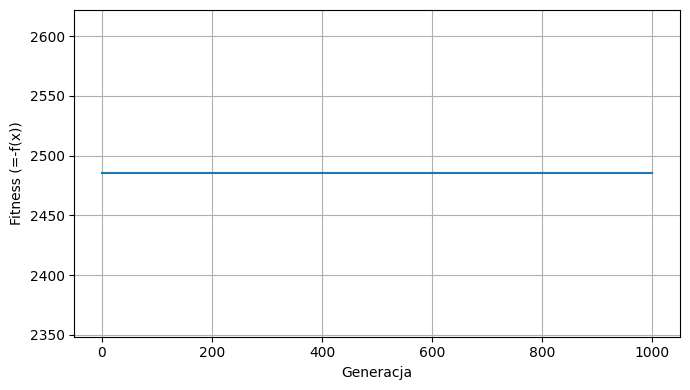

In [30]:
# ==========================================
# Wykres zbieżności fitness
# ==========================================

# PyGAD przechowuje historię FITNESS (czyli -f(x))
# Otrzymujemy wektor, który zawiera wartość najlepszego ff po każdej generacji
fitness_history = ga.best_solutions_fitness

plt.figure(figsize=(7, 4))
plt.plot(fitness_history)
plt.xlabel("Generacja")
plt.ylabel("Fitness (=-f(x))")
plt.grid(True)
plt.tight_layout()
plt.show()

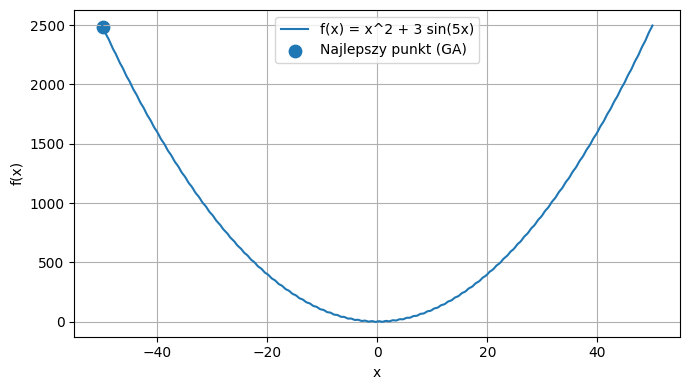

In [31]:
# ==========================================
# Wykres funkcji i najlepszy punkt
# ==========================================

xs = np.linspace(INIT_LOW, INIT_HIGH, 400)
ys = xs**2 + 3*np.sin(5*xs)

plt.figure(figsize=(7, 4))
plt.plot(xs, ys, label="f(x) = x^2 + 3 sin(5x)")
plt.scatter([best_x], [best_f], s=80, label="Najlepszy punkt (GA)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Przykład 2**

Dobór paneli izolacyjnych (0/1), z ograniczeniami na masę i koszt, a celem jest maksymalizacja izolacyjności.

In [32]:
import numpy as np
import pygad

# ============================================================
# Każdy panel ma: masę [kg], koszt [zł], izolacyjność [umowna jednostka]
# ============================================================

masses = np.array([4.0, 3.0, 2.5, 5.0, 3.5, 4.5, 2.0, 1.5, 3.2, 2.8])
costs  = np.array([50,  40,  35,  70,  55,  65,  30,  25,  45,  38])
insul  = np.array([15,  11,  10,  18,  13,  16,   8,   7,  12,  9 ])

num_items = len(masses)

# Ograniczenia, np. maksymalna masa i koszt całkowity
MAX_MASS = 18.0   # kg
MAX_COST = 220.0  # zł

# Współczynnik kary za przekroczenie ograniczeń
LAMBDA_MASS = 5.0
LAMBDA_COST = 2.0

In [33]:
# ============================================================
# Funkcja fitness dla PyGAD
# solution: wektor 0/1 oznaczający, czy dany panel jest wybrany
# ============================================================

def fitness_func(ga_instance, solution, solution_idx):
    # rzutowanie na np.array
    x = np.array(solution)

    # Masa, koszt, izolacyjność zestawu
    total_mass = np.sum(masses * x)
    total_cost = np.sum(costs * x)
    total_insul = np.sum(insul * x)

    # Kary za przekroczenie ograniczeń
    penalty = 0.0

    if total_mass > MAX_MASS:
        penalty += LAMBDA_MASS * (total_mass - MAX_MASS)

    if total_cost > MAX_COST:
        penalty += LAMBDA_COST * (total_cost - MAX_COST)

    # Celem jest MAKSYMALIZACJA izolacyjności przy ograniczeniach
    fitness = total_insul - penalty
    return fitness

In [34]:
# ============================================================
# Konfiguracja GA w PyGAD
# ============================================================

ga = pygad.GA(
    num_generations=30,
    num_parents_mating=10,
    fitness_func=fitness_func,
    sol_per_pop=30,           # liczba osobników w populacji
    num_genes=num_items,      # liczba genów = liczba paneli

    # geny binarne: 0 lub 1
    gene_space=[0, 1],

    # selekcja, krzyżowanie, mutacja
    parent_selection_type="tournament",
    K_tournament=3,
    crossover_type="single_point",

    mutation_type="random",
    mutation_percent_genes=30,   # ile % genów mutuje w osobniku
    mutation_by_replacement=True,

    random_seed=42
)

Najlepsze rozwiązanie (wektor 0/1): [1 1 1 1 0 0 0 1 0 0]
Indeksy wybranych paneli: [0 1 2 3 7]
Całkowita masa:  16.00 kg (limit 18.0 kg)
Całkowity koszt: 220.00 zł (limit 220.0 zł)
Całkowita izolacyjność: 61.00
Fitness (po uwzględnieniu kar): 61.00


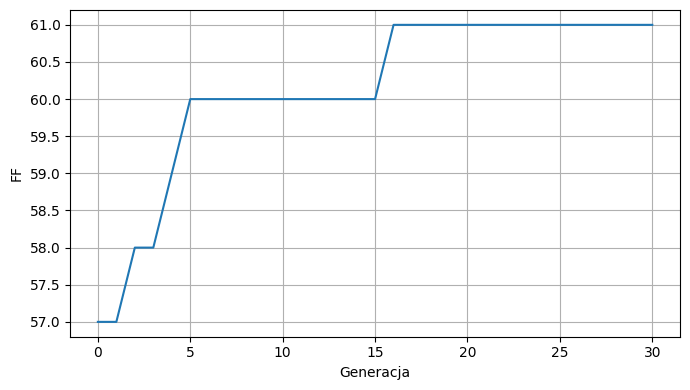

In [35]:
# ============================================================
# Uruchomienie optymalizacji i prezentacja wyników
# ============================================================

ga.run()

# Najlepsze rozwiązanie
solution, solution_fitness, solution_idx = ga.best_solution()

x_best = np.array(solution, dtype=int)

total_mass = np.sum(masses * x_best)
total_cost = np.sum(costs * x_best)
total_insul = np.sum(insul * x_best)

print("Najlepsze rozwiązanie (wektor 0/1):", x_best)
print("Indeksy wybranych paneli:", np.where(x_best == 1)[0])
print(f"Całkowita masa:  {total_mass:.2f} kg (limit {MAX_MASS} kg)")
print(f"Całkowity koszt: {total_cost:.2f} zł (limit {MAX_COST} zł)")
print(f"Całkowita izolacyjność: {total_insul:.2f}")
print(f"Fitness (po uwzględnieniu kar): {solution_fitness:.2f}")

# Historia ff
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))
plt.plot(ga.best_solutions_fitness)
plt.xlabel("Generacja")
plt.ylabel("FF")
plt.grid(True)
plt.tight_layout()
plt.show()